# What is Auto_ViML:-
Auto_ViML was designed for building High Performance Interpretable Models with the least variables. The "V" in Auto_ViML stands for Variant because it tries Multiple Models and Multiple Features to find the best performing model for any dataset. The "i" in Auto_ViML stands for "Interpretable" since it selects the fewest features to build a simpler, more interpretable model. This is key. Some of the differentiators of Auto_ViML from other open source AutoML libraries is as follows: Auto_ViML is the package that:

1.Requires no data prep - you can send in your entire dataframe without a single change. It loves dirty data!


2.Requires no classification of variables: All other packages want you to tell them which variables are numeric, categorical, NLP text, date variables etc. autoVimal detects all of these automatically as any AutoML package should!


3.Does feature reduction automatically! All other packages use all the variables you send them which means they are either bloated or highly complex models. Autovimal is the only package that produces the best model with the fewest variables. That means it is very easy to interpret!


4.Produces charts and graphs automatically. Just set verbose to 1 or 2


5.Handles both text, date and numeric and categorical data all in the same model. In other packages they cannot Handle NLP. Some Cannot handle date variables. But AutoViML is the only package that uses all of them!


Auto_ViML is built using Scikit-Learn, Numpy, Pandas and Matplotlib. It should run on any Python 2 or Python 3 Anaconda installations. You won't have to import any special Libraries other than "CatBoost" and "SHAP" library for interpretability. But if you don't have these Auto_ViML will skip it and show you the regular feature importances.

## Install Libraies and importing important libraries

In [13]:
!pip install autoviml

In [14]:
!pip install shap

In [0]:
from __future__ import print_function
import sys,tempfile, urllib, os
import pandas as pd
from autoviml.Auto_ViML import Auto_ViML


## Load data

In [0]:
data = pd.read_csv('Patient_data.csv')

In [17]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,Abnormal
1,39.06,10.06,25.02,29.00,114.41,4.56,Abnormal
2,68.83,22.22,50.09,46.61,105.99,-3.53,Abnormal
3,69.30,24.65,44.31,44.64,101.87,11.21,Abnormal
4,49.71,9.65,28.32,40.06,108.17,7.92,Abnormal


## Train-Test Split and decide target variable

In [0]:
size = int(0.7*data.shape[0])
train_df = data[:size]
test_df = data[size:]

In [0]:
# Decide target
target='class'

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (217, 7)
    Training Set Memory Usage = 0.01 MB
Test Set Shape = (93, 7)
    Test Set Memory Usage = 0.01 MB
Single_Label Target: ['class']
Shuffling the data set before training
 Class  -> Counts -> Percent
Abnormal:     210  ->   96.8%
Normal:       7  ->    3.2%
Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
String or Multi Class target: class transformed as follows: {'Abnormal': 0, 'Normal': 1}
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  6
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
  

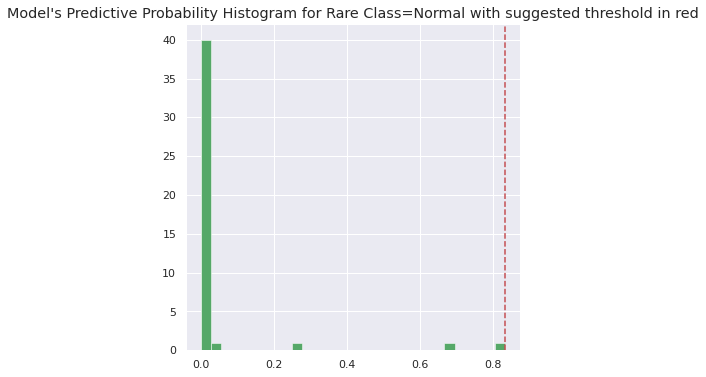

    Using threshold=0.5. However, 0.835 provides better F1=1.00 for rare class...
########################################################
XGBoost Model Prediction Results on Held Out CV Data Set:
    Regular Accuracy Score = 97.7%
Balanced Accuracy = 98.84% with Threshold = 0.50
Confusion Matrix:
[[42  1]
 [ 0  1]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.50      1.00      0.67         1

    accuracy                           0.98        44
   macro avg       0.75      0.99      0.83        44
weighted avg       0.99      0.98      0.98        44

Balanced Accuracy = 100.00% with Threshold = 0.83
Confusion Matrix:
[[43  0]
 [ 0  1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00         1

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00       

After multiple models, Ensemble Model Results:
    Balanced Accuracy Score = 50.000%
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        43
           1       0.00      0.00      0.00         1

    accuracy                           0.98        44
   macro avg       0.49      0.50      0.49        44
weighted avg       0.96      0.98      0.97        44

[[43  0]
 [ 1  0]]
#############################################################################
Single Model is better than Ensembling Models for this data set.


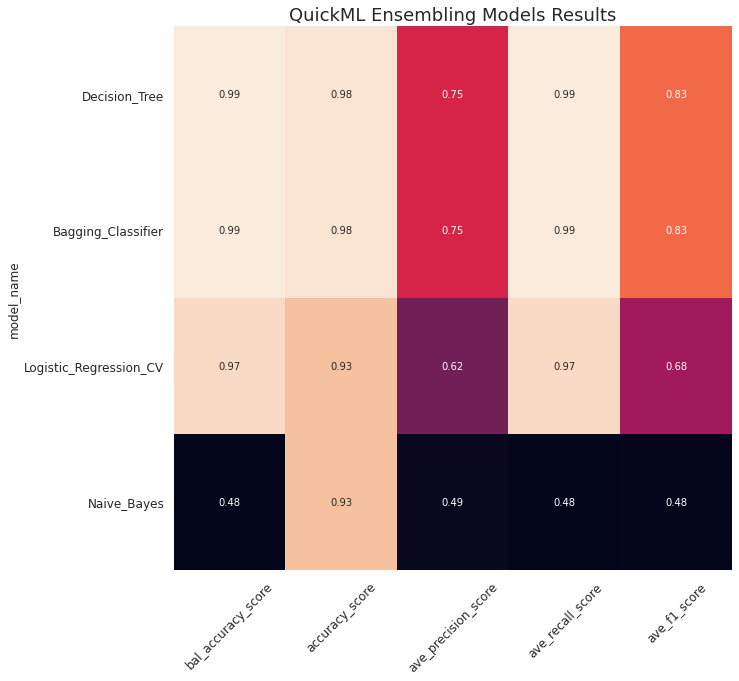

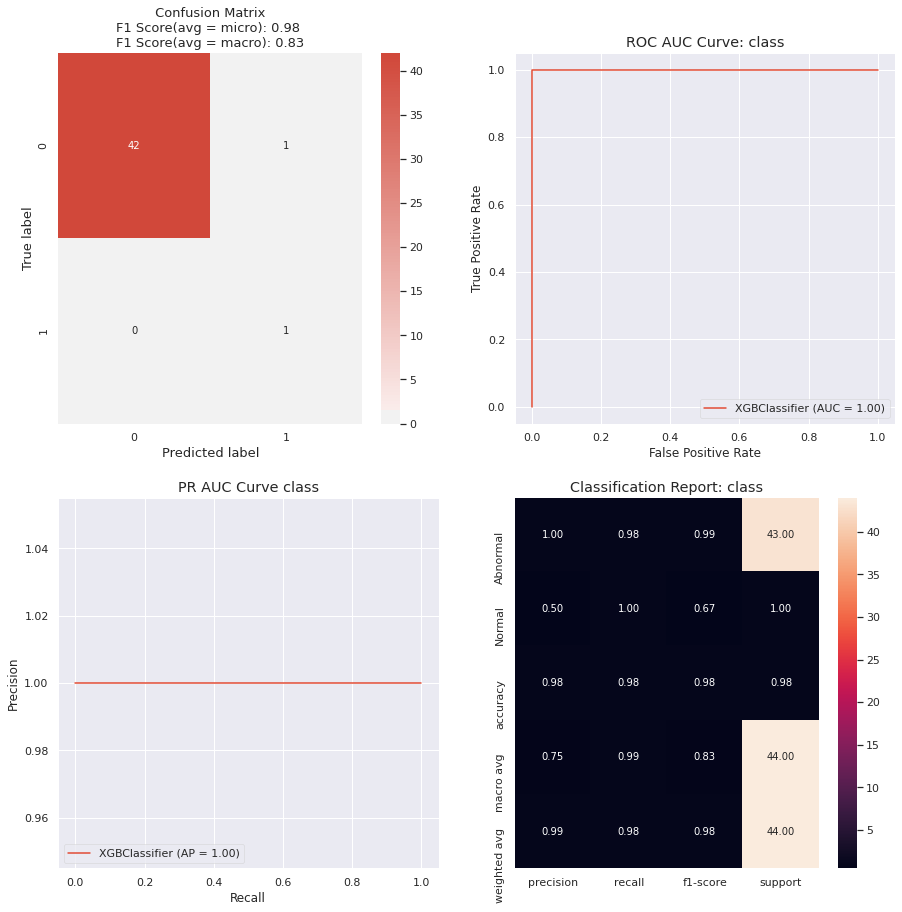

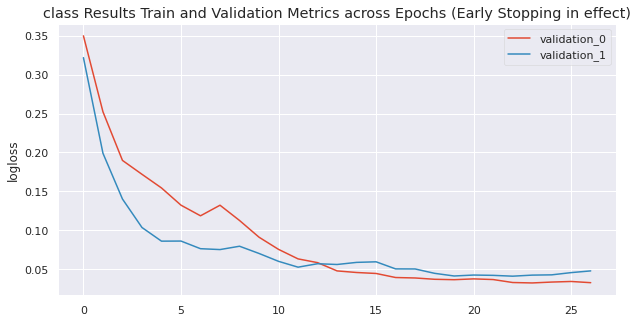

    Time taken for this Target (in seconds) = 9
Training model on complete Train data and Predicting using give Test Data...
    Binning_Flag set to False or there are no numeric vars in data set to be binned
Feature scaling for total 4 float and integer variables completed using MinMaxScaler(copy=True, feature_range=(0, 1))...
##################  Imbalanced Flag Set  ############################
Imbalanced Class Training using SMOTE Rare Class Oversampling method...
    Number of Rare Class samples = 7
    Number of K Neighbors selected for SMOTE = 6
    Pct of Rare Class in data = 3.23%
Using SMOTE's over-sampling techniques to make the 2 classes balanced...
    SMOTE completed. Actual time taken = 0 seconds
##################  Training XGBClassifier on Imbalanced data...  ################
Imbalanced class training completed.
Actual Training time taken in seconds = 0
    Making test Data predictions using modified Threshold = 0.835
    Calculating weighted average ensemble of 5 class

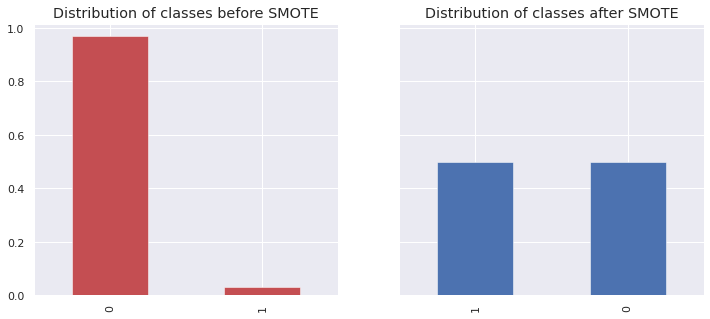

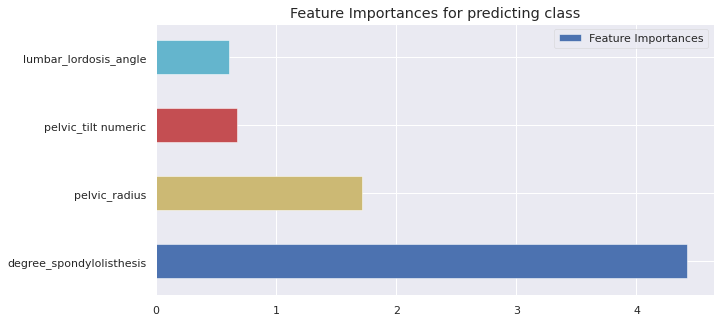

In [20]:
model, features, trainm, testm = Auto_ViML(train_df, target, test_df, sample_submission='',
                                    scoring_parameter='',
                                    hyper_param='RS',feature_reduction=True,
                                     Boosting_Flag=True,Binning_Flag=False,
                                    Add_Poly=0, Stacking_Flag=False, 
                                    Imbalanced_Flag=True, 
                                    verbose=1)

hyper_param: Tuning options are GridSearch ('GS') and RandomizedSearch ('RS'). Default is 'GS'.

feature_reduction: Default = 'True' but it can be set to False if you don't want automatic    

Boosting Flag: you have 4 possible choices (default is False):                               
  None = This will build a Linear Model                                                  
  False = This will build a Random Forest or Extra Trees model (also known as Bagging)        
  True = This will build an XGBoost model                                                     
  CatBoost = THis will build a CatBoost model (provided you have CatBoost installed)          



In [21]:
features

['degree_spondylolisthesis',
 'pelvic_radius',
 'pelvic_tilt numeric',
 'lumbar_lordosis_angle']

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
testm

,degree_spondylolisthesis,pelvic_radius,pelvic_tilt numeric,lumbar_lordosis_angle,class_predictions,class_proba_Abnormal,class_proba_Normal,class_Logistic_Regression_CV_predictions,class_Decision_Tree_predictions,class_Naive_Bayes_predictions,class_Bagging_Classifier_predictions,class_XGBoost_predictions,class_Ensembled_predictions
217,0.04,0.67,0.23,0.33,Abnormal,0.66,0.34,Normal,Normal,Normal,Abnormal,Abnormal,Abnormal
218,0.03,0.64,0.40,0.19,Normal,0.00,1.00,Normal,Normal,Normal,Normal,Normal,Normal
219,0.03,0.39,0.59,0.33,Abnormal,1.00,0.00,Abnormal,Abnormal,Abnormal,Abnormal,Abnormal,Abnormal
220,0.02,0.47,0.51,0.16,Abnormal,1.00,0.00,Abnormal,Abnormal,Abnormal,Abnormal,Abnormal,Abnormal
221,0.02,0.61,0.22,0.35,Normal,0.01,0.99,Normal,Normal,Normal,Abnormal,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,0.01,0.51,0.36,0.20,Abnormal,0.99,0.01,Normal,Abnormal,Normal,Abnormal,Abnormal,Abnormal
306,0.02,0.48,0.49,0.14,Abnormal,1.00,0.00,Abnormal,Abnormal,Abnormal,Abnormal,Abnormal,Abnormal
307,0.02,0.60,0.52,0.29,Abnormal,0.36,0.64,Normal,Abnormal,Normal,Abnormal,Abnormal,Abnormal
308,0.03,0.52,0.27,0.25,Normal,0.03,0.97,Normal,Normal,Normal,Normal,Normal,Normal


In [0]:
print(classification_report(test_df[target].values,testm['data_Ensembled_predictions'].values))

              precision    recall  f1-score   support

          No       0.83      0.90      0.86      1533
         Yes       0.66      0.52      0.58       580

    accuracy                           0.79      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.78      0.79      0.79      2113

